## **Problem statement: Prediction of area under forest fires using regression algorithms and comparison of the results**

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, explained_variance_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [ ]:
df= pd.read_csv("forestfires.csv")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.sample(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
306,7,4,sep,sun,89.6,84.1,714.3,5.7,17.1,53,5.4,0.0,0.41
91,8,6,mar,fri,91.7,35.8,80.8,7.8,17.4,24,5.4,0.0,0.00
109,4,5,sep,mon,88.6,91.8,709.9,7.1,17.4,56,5.4,0.0,0.00
10,7,5,sep,sat,92.5,88.0,698.6,7.1,17.8,51,7.2,0.0,0.00
331,7,4,sep,sat,91.2,124.4,795.3,8.5,21.5,28,4.5,0.0,15.64


In [ ]:
df.shape

(517, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
df.isnull().sum()

,0
X,0
Y,0
month,0
day,0
FFMC,0
DMC,0
DC,0
ISI,0
temp,0
RH,0


Thus our data has no missing values.

## Checking for Duplicated rows

In [ ]:
df.duplicated().sum()

4

In [ ]:
# treating the duplicated rows/ removing the duplicated data
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(513, 13)

We see that the total number of unique data points are 513 with all non- null entries.

##Converting categorical to numerical columns

Since month and day are nominal data, we use one-hot encoding for transforming these into numerical data.

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.get_dummies(df, columns = ['month', 'day'], dtype= int, drop_first = True)
print(df)

     X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  month_aug  \
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00          0   
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00          0   
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00          0   
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00          0   
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00          0   
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...        ...   
512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44          1   
513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29          1   
514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16          1   
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00          1   
516  6  3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00          0   

     month_dec  month_feb  month_jan  month_jul  mo

In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,4.678363,4.300195,90.637427,110.989279,549.155166,9.023587,18.887524,44.348928,4.010526,0.021832,12.891598,0.354776,0.017544,0.038986,0.003899,0.062378,0.031189,0.103314,0.003899,0.001949,0.029240,0.335283,0.144250,0.161793,0.183236,0.118908,0.124756,0.103314
std,2.320059,1.230925,5.540920,64.191013,247.724594,4.575543,5.828128,16.358803,1.796613,0.297107,63.892586,0.478912,0.131414,0.193751,0.062378,0.242077,0.173998,0.304665,0.062378,0.044151,0.168642,0.472550,0.351685,0.368621,0.387237,0.323997,0.330765,0.304665
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,440.900000,6.400000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
correlation_matrix = df.corr()

<Axes: >

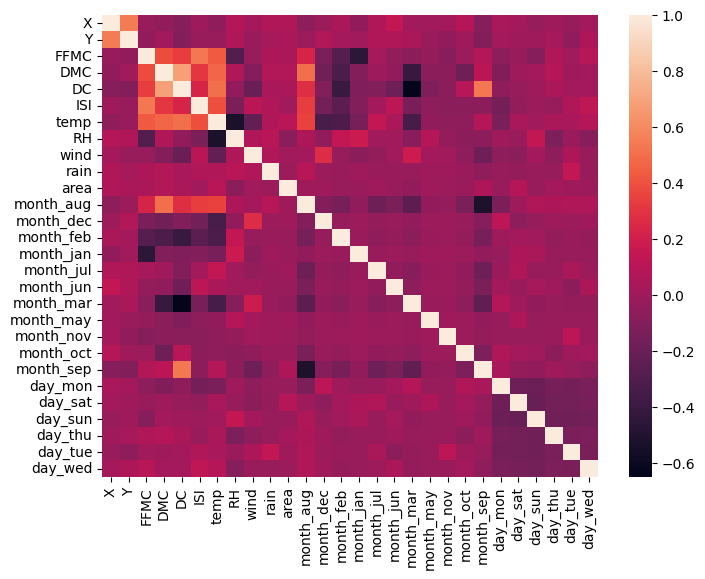

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr())

In [ ]:
# threshold = 0.5

# printed_pairs = set()

# # Iterate through the filtered pairs and print them
# for col in filtered_pairs.columns:
#     correlated_vars = filtered_pairs[col][filtered_pairs[col].abs() > threshold].index.tolist()
#     for var in correlated_vars:
#         if col != var:  # skip pairs of themselves
#             if (var, col) not in printed_pairs:  # check if the pair (var1, var2) has been printed
#                 corr_value = filtered_pairs[col][var]
#                 # Ensure var1 < var2 to print the pair only once in lexicographical order
#                 if var < col:
#                     print(f"{var} - {col}: {corr_value}")
#                 else:
#                     print(f"{col} - {var}: {corr_value}")
#                 printed_pairs.add((col, var))  # add the pair (var1, var2) to printed pairs set

We have following conclusions:
*   High positive correlation between FFMC & ISI (0.53208), DMC and DC (0.681741), temp and FFMC (0.4316), temp and DMC (0.4696), temp and DC (0.4976), temp and ISI (-0.3942)
*   High negative correlation between RH and temp (-0.528670)
*   Monthwise: September and DC (0.532222), March & DC (-0.649163)
*   High positive correlation between X and Y (0.542705). Let's study these variables separately.



In [ ]:
df.pivot_table(index='Y',columns='X', aggfunc='size', fill_value=0)

X,1,2,3,4,5,6,7,8,9
Y,,,,,,,,,
2,19,25,0,0,0,0,0,0,0
3,10,1,1,21,0,25,2,3,0
4,15,27,42,35,23,9,45,1,4
5,4,20,7,25,3,49,11,4,2
6,0,0,3,8,4,3,2,52,1
8,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,6


<Axes: xlabel='X', ylabel='Y'>

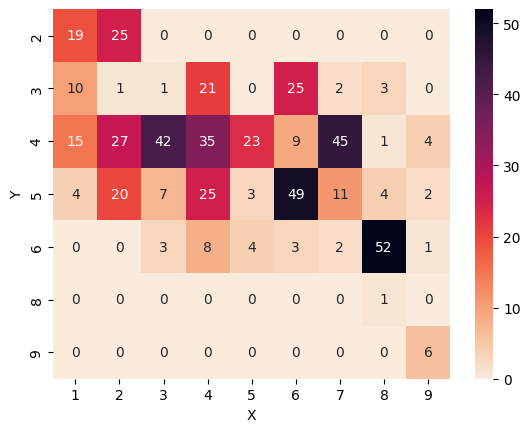

In [ ]:
sns.heatmap(df.pivot_table(index='Y',columns='X', aggfunc='size', fill_value=0),annot=True, cmap='rocket_r')

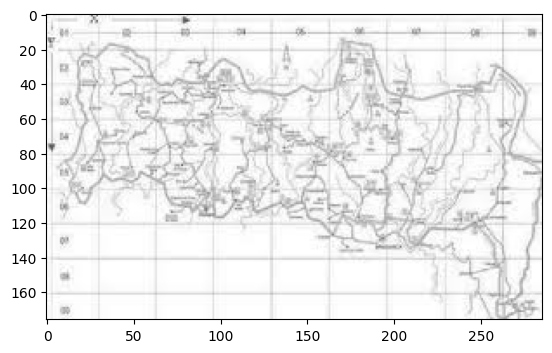

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/ff.jpeg')
plt.imshow(img)

Clearly, the spatial coordinates towards the centre of the park have high occurences of forest fire in the data. That means these areas are more prone to fire. Also, the coordinate (8, 6) has the highest number of occurences of fire, i.e., 52.

In [ ]:
# Count the occurrences of each (X, Y) pair
xy_counts = df.groupby(['X', 'Y']).size().reset_index(name='num_fires')

# Merge these counts back into the original DataFrame
df = df.merge(xy_counts, on=['X', 'Y'], how='left')

# Drop the original X and Y columns
df = df.drop(columns=['X', 'Y'])

# Now df contains the new feature 'num_fires' without the X and Y columns
print(df.head())

   FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  month_aug  month_dec  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0          0          0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0          0          0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0          0          0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0          0          0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0          0          0   

   month_feb  month_jan  month_jul  month_jun  month_mar  month_may  \
0          0          0          0          0          1          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          1          0   
4          0          0          0          0          1          0   

   month_nov  month_oct  month_sep  day_mon  day_sat  day_sun  day_thu  \
0          0          0 

# Feature Engineering

## 1. Outlier Detection

In [ ]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,num_fires
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,45
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,45
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,52
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,52


We'll now create boxplots for the variables excluding months, days and the spatial coords as these have values belonging to a certain range and extreme values won't be observed.

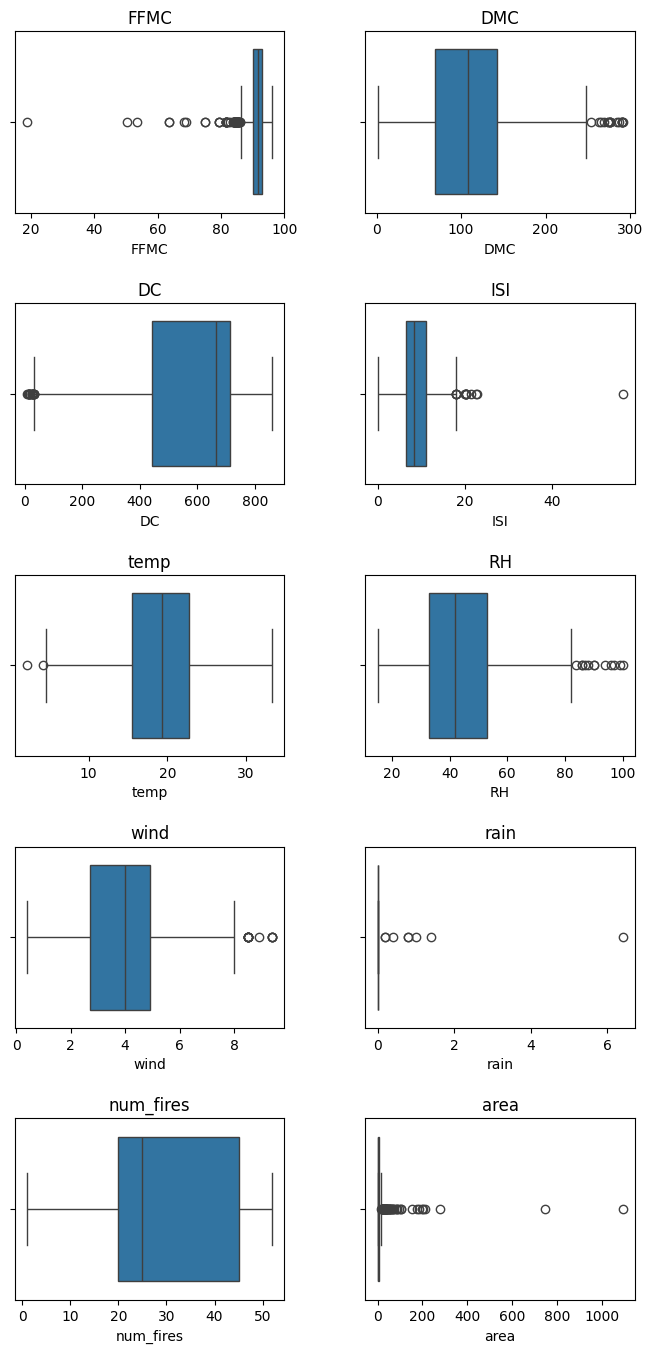

In [ ]:
df2= df[['FFMC','DMC','DC','ISI','temp','RH','wind','rain', 'num_fires', 'area']]

plt.figure(figsize=(8, 20))

for i, column in enumerate(df2.columns):
    plt.subplot(len(df2.columns)//2 + 1, 2, i + 1)
    sns.boxplot(x=df2[column])
    plt.title(column)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

We can observe that these variables have outliers, now can indivudiually check the data for each variable to identify the same.

Looking for outliers in the area column

<Axes: xlabel='area', ylabel='Count'>

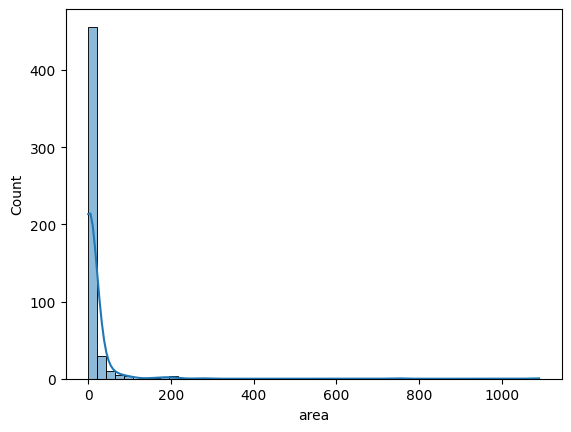

In [ ]:
sns.histplot(x=df['area'],kde=True, bins = 50)

In [ ]:
df['area'].skew()

12.802213419146321

In [ ]:
df['area'].kurtosis()

192.73391233370953

Area is highly right skewed, hence using log transformation on it.

<Axes: xlabel='log_area', ylabel='Count'>

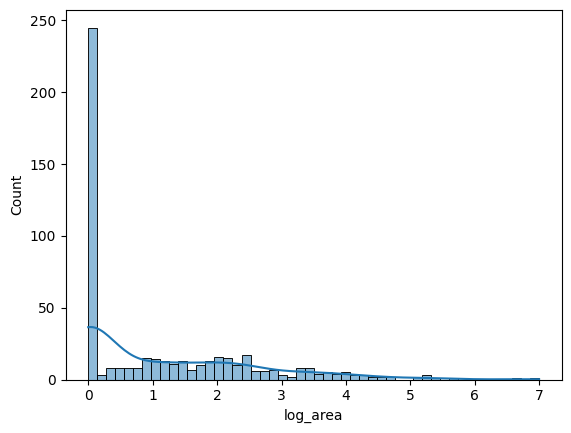

In [ ]:
df['log_area'] = np.log1p(df['area'])
sns.histplot(x=df['log_area'],kde=True, bins = 50)

In [ ]:
df['log_area'].skew()

1.2193979428475714

In [ ]:
df['log_area'].kurtosis()

0.9618801186518136

Hence, there's a massive improvement on using log transformation. Using this variable further to find outliers.

In [ ]:
# Finding the IQR
p25 = df['log_area'].quantile(0.25)
p75 = df['log_area'].quantile(0.75)

IQR = p75-p25
highest_allowed = p75+1.5*IQR
lowest_allowed = p25-1.5*IQR
print("highest allowed: ", highest_allowed)
print("lowest allowed: ", lowest_allowed)

highest allowed:  5.0604826686233935
lowest allowed:  -3.0362896011740363


In [ ]:
df[(df['log_area']>5.1) | (df['log_area']<-3.04)]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,num_fires,log_area
232,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,52,5.285637
233,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,25,5.307971
234,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,19,5.365415
235,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,49,6.995620
373,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,25,5.168380
411,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,52,6.616440
416,91.7,191.4,635.9,7.8,26.2,36,4.5,0.0,185.76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5.229824
475,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,45,5.633110


In [ ]:
#Using 3 sigma limits
print("highest allowed", df['log_area'].mean()+3*df['log_area'].std())
print("lowest allowed", df['log_area'].mean()-3*df['log_area'].std())

highest allowed 5.306134808186587
lowest allowed -3.079972931690027


In [ ]:
 df[(df['log_area']>5.31) | (df['log_area']<-3.08)]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,num_fires,log_area
234,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,19,5.365415
235,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,49,6.995620
411,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,52,6.616440
475,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,45,5.633110


These are the outliers detected by the mathematical formula. But, we notice that the areas where extreme values of burned area have occured are the ones which have one of the highest numbers of forest fires in the data. Hence, we are considering these values as extreme values and not outliers.

In [ ]:
highest_allowed_ = {}
lowest_allowed_ = {}

for i in df2.columns:

    p25= round(df2[i].quantile(0.25), 2)
    p75 = round(df2[i].quantile(0.75), 2)
    IQR = p75-p25
    highest_allowed_[i] = p75+1.5*IQR
    lowest_allowed_[i] = p25-1.5*IQR

summary_table = pd.DataFrame({
    'Column': df2.columns,
    'highest_allowed': [highest_allowed_[i] for i in df2.columns],
    'lowest_allowed': [lowest_allowed_[i] for i in df2.columns]
})

print(summary_table)

      Column  highest_allowed  lowest_allowed
0       FFMC           96.950          86.150
1        DMC          253.100         -42.100
2         DC         1123.400          31.400
3        ISI           17.900          -0.500
4       temp           33.750           4.550
5         RH           83.000           3.000
6       wind            8.200          -0.600
7       rain            0.000           0.000
8  num_fires           82.500         -17.500
9       area           16.425          -9.855


In [ ]:
for i in df2.columns:
  print(i)
  print(df2[(df2[i]>highest_allowed_[i]) | (df2[i]<lowest_allowed_[i])])
  print('\n')


FFMC
     FFMC   DMC     DC  ISI  temp   RH  wind  rain  num_fires    area
12   63.5  70.8  665.3  0.8  17.0   72   6.7   0.0         49    0.00
17   84.9  32.8  664.2  3.0  16.7   47   4.9   0.0          4    0.00
40   79.5  60.6  366.7  1.5  23.3   37   3.1   0.0         35    0.00
57   84.0   9.3   34.0  2.1  13.9   40   5.4   0.0         25    0.00
74   84.2   6.8   26.6  7.7   6.7   79   3.1   0.0          6    0.00
95   83.9   8.0   30.2  2.6  12.7   48   1.8   0.0         42    0.00
96   69.0   2.4   15.5  0.7  17.4   24   5.4   0.0         42    0.00
102  82.1   3.7    9.3  2.9   5.3   78   3.1   0.0         27    0.00
103  85.9  19.5   57.3  2.8  12.7   52   6.3   0.0         25    0.00
108  85.9  19.5   57.3  2.8  13.7   43   5.8   0.0         35    0.00
121  84.4  73.4  671.9  3.2  17.9   45   3.1   0.0         42    0.00
128  68.2  21.5   87.2  0.8  15.4   40   2.7   0.0          8    0.00
136  85.8  48.3  313.4  3.9  18.0   42   2.7   0.0          6    0.36
145  84.4  73.4

Through inspection, we found only these two values as outliers. Hence, we used capping method for dealing with them.

In [ ]:
df['FFMC'] = df['FFMC'].replace(18.7, 86.150)
df['rain'] = df['rain'].replace(6.4, 0.0)



---



#Model Development

Checking assumption of **Linearity**

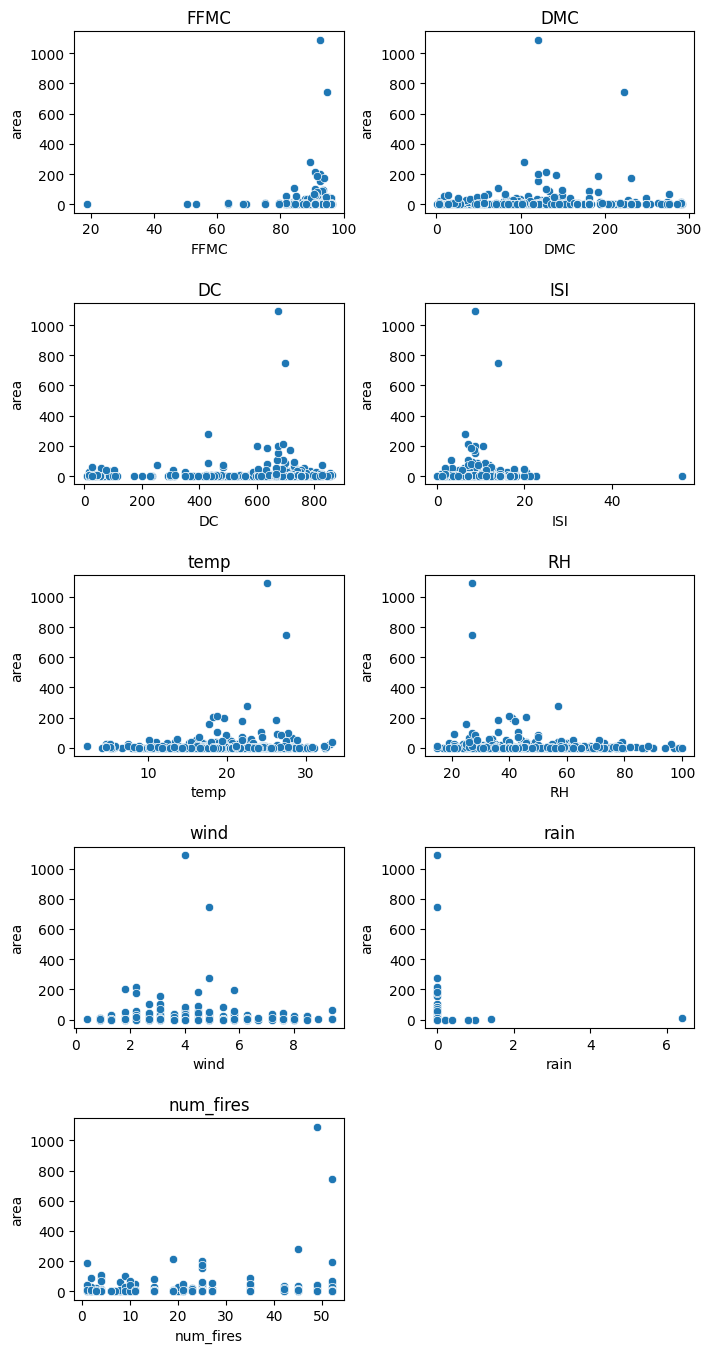

In [ ]:
plt.figure(figsize=(8, 20))

for i, column in enumerate(df2.columns.drop(['area'])):
    plt.subplot(len(df2.columns)//2 + 1, 2, i + 1)
    sns.scatterplot(df2,x=df2[column],y=df2['area'])
    plt.title(column)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

The relationship between the regressors and the regressed are not linear.

Checking Mulitcolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
indep = df.drop(['area','log_area'], axis = 1)
vif_data = pd.DataFrame()
vif_data['Feature'] = indep.columns
vif_data['VIF'] = [variance_inflation_factor(indep.values, i) for i in range(indep.shape[1])]

# Display VIF values
print(vif_data)

      Feature         VIF
0        FFMC  142.257664
1         DMC   14.432400
2          DC  154.912891
3         ISI    7.874223
4        temp   48.319975
5          RH   19.172298
6        wind    7.441686
7        rain    1.104070
8   month_aug   63.734282
9   month_dec    2.837032
10  month_feb    3.068395
11  month_jan    1.278934
12  month_jul    8.471431
13  month_jun    3.666171
14  month_mar    6.910766
15  month_may    1.271834
16  month_nov    1.120035
17  month_oct    7.506678
18  month_sep   75.654013
19    day_mon    1.993380
20    day_sat    2.064057
21    day_sun    2.221865
22    day_thu    1.841309
23    day_tue    1.830874
24    day_wed    1.708451
25  num_fires    4.844663


PCA

In [ ]:
from sklearn.decomposition import PCA

##Model Developement before transforming

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['area', 'log_area'], axis = 1), df['log_area'], test_size=0.2, random_state=2)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

print(f'Training Set MAE: {mean_absolute_error(y_train, y_train_pred):.4f}')
print(f'Training Set R2 score: {r2_score(y_train, y_train_pred):.4f}')
print(f'Test Set MAE: {mean_absolute_error(y_test, y_test_pred):.4f}')
print(f'Test Set R2 score: {r2_score(y_test, y_test_pred):.4f}')
print(f'Test Set RMSE: {mean_squared_error(y_test, y_test_pred):.4f}')

Training Set MAE: 1.0867
Training Set R2 score: 0.0896
Test Set MAE: 1.1485
Test Set R2 score: -0.0211
Test Set RMSE: 1.9842


**Conclusions:**
* MAE measures the average absolute errors between predicted values and actual values. In this case, the training set MAE (1.0795) is lower than the test set MAE (1.2041), suggesting that the model performs slightly better on the training data than on the test data.

* The training set R² score is 0.1013, which means the model explains about 10.13% of the variance in the target variable for the training set. This is a relatively low value, indicating that the model is not very good at capturing the variability in the data.

* The test set R² score is -0.1006, which is negative, indicating that the model performs worse than simply using the mean of the target values as the prediction. This suggests that the model is not generalizing well to unseen data.

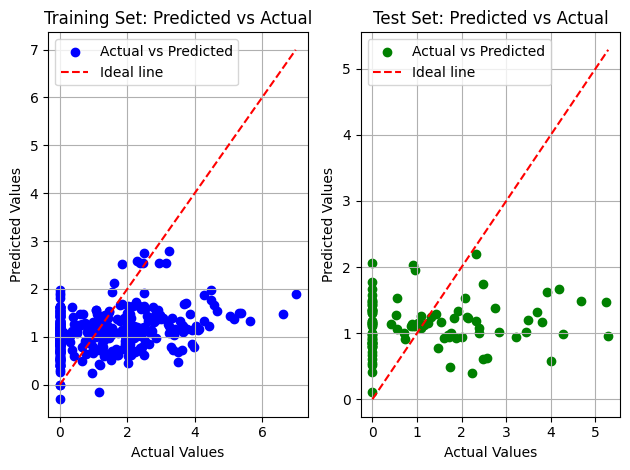

In [ ]:
# Plot for training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal line')
plt.title('Training Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal line')
plt.title('Test Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The results are bad because of lots of zeroes and the linearity assumption of LiR isn't satisfied.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

for col in X_train.columns:
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

PCA

In [ ]:
pc = len(indep.columns.values) #number columns = 25
pca = PCA(n_components=pc)
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
indexes = ['PC' + str(i) for i in range(1, pc+1)]
cumsum_df = pd.DataFrame(data=cumsum, index=indexes, columns=['var1'])
cumsum_df['var2'] = pd.Series([round(val, 4) for val in cumsum_df['var1']], index = cumsum_df.index)
cumsum_df['Cumulative Explained Variance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in cumsum_df['var2']], index = cumsum_df.index)
cumsum_df = cumsum_df.drop(['var1','var2'], axis=1, inplace=False)
cumsum_df.T.iloc[:,:26]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
Cumulative Explained Variance,19.17%,34.31%,43.89%,52.64%,60.13%,67.03%,72.75%,78.19%,82.26%,85.84%,88.43%,90.76%,92.79%,94.71%,96.01%,97.01%,97.91%,98.36%,98.77%,99.08%,99.33%,99.54%,99.71%,99.85%,99.96%,100.00%


In [ ]:
pc = 12
pca = PCA(n_components=pc)
pca.fit(X_train)
X_train = pd.DataFrame(pca.transform(X_train))
X_test = pd.DataFrame(pca.transform(X_test))
X_train.columns = ['PC' + str(i) for i in range(1, pc+1)]
X_test.columns = ['PC' + str(i) for i in range(1, pc+1)]
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.056221,-0.306392,0.034895,0.006934,-0.009734,-0.039393,0.139665,0.201940,-0.430786,-0.097592,-0.138834,0.571096
1,-0.716761,0.268155,0.044106,0.008088,-0.024097,-0.007289,0.116898,0.388837,-0.121207,-0.121550,0.064566,-0.082494
2,-0.065874,-0.278222,-0.396845,0.737849,0.383633,-0.009134,0.016275,0.114669,-0.364161,0.067626,-0.545281,0.365296
3,0.774086,0.182980,0.826579,0.033899,0.261888,0.011292,-0.067066,0.277654,0.003755,-0.071284,0.102112,0.044058
4,-0.009018,-0.991301,-0.139647,-0.085153,-0.656273,0.830744,-0.156539,0.453091,0.210416,0.347468,-0.116251,-0.129619


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
print(f'Training Set MAE: {mean_absolute_error(y_train, y_train_pred):.4f}')
print(f'Training Set R2 score: {r2_score(y_train, y_train_pred):.4f}')
print(f'Test Set MAE: {mean_absolute_error(y_test, y_test_pred):.4f}')
print(f'Test Set R2 score: {r2_score(y_test, y_test_pred):.4f}')
print(f'Test Set RMSE: {mean_squared_error(y_test, y_test_pred):.4f}')

Training Set MAE: 1.1281
Training Set R2 score: 0.0332
Test Set MAE: 1.1736
Test Set R2 score: -0.0433
Test Set RMSE: 2.0274


Hence, we will handle the zeroes separately.

**AIM:** Separate the problem into two stages: first, predict whether the target is zero or not (classification task). Then, for the non-zero cases, predict the actual value (regression task).

In [ ]:
# Step 1: Classification Task
df['is_non_zero'] = (df['log_area'] != 0.00).astype(int) #Adding new indicator column

# Prepare data for classification
X = df.drop(columns=['log_area', 'area', 'is_non_zero'])
y_classification = df['is_non_zero']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Train the classifier
clf = RandomForestClassifier()
clf.fit(X_train_clf, y_train_clf)

# Predict and evaluate the classifier
y_pred_train_clf = clf.predict(X_train_clf)
y_pred_test_clf = clf.predict(X_test_clf)

print("Classification Report (Train):")
print(classification_report(y_train_clf, y_pred_train_clf))

print("Classification Report (Test):")
print(classification_report(y_test_clf, y_pred_test_clf))

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       1.00      0.99      0.99       219

    accuracy                           0.99       410
   macro avg       0.99      0.99      0.99       410
weighted avg       0.99      0.99      0.99       410

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.63      0.55      0.59        53
           1       0.58      0.66      0.62        50

    accuracy                           0.60       103
   macro avg       0.60      0.60      0.60       103
weighted avg       0.61      0.60      0.60       103



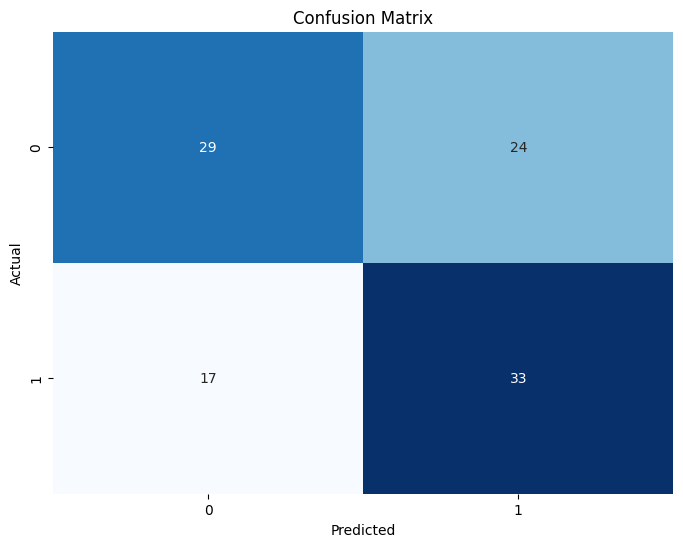

In [ ]:
# Plot confusion matrix for classification task
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_clf, y_pred_test_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Step 2: Regression Task
df_non_zero = df[df['log_area'] != 0.00]

def regression_models_evaluation(df, target_col, test_size=0.2, random_state=42):
    # Prepare data for regression
    X = df.drop(columns=[target_col, 'area', 'is_non_zero'])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1),
        'Lasso': Lasso(),
        'Elastic Net': ElasticNet(alpha=0.05, l1_ratio=0.5),
        'Decision Tree': DecisionTreeRegressor(max_depth=5),
        'Random Forest': RandomForestRegressor()
    }

    # List to store results
    results_list = []

    # Train and evaluate models
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)


    # Calculate metrics
        rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
        rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)

        results_list.append({
            'Model': name,
            'RMSE Train': rmse_train,
            'RMSE Test': rmse_test,
            'R2 Train': r2_train,
            'R2 Test': r2_test,
        })
    results = pd.DataFrame(results_list)
    return results, X_train, X_test, y_train, y_test


In [ ]:
# Execute the evaluation
results, X_train, X_test, y_train, y_test = regression_models_evaluation(df_non_zero, 'log_area')
print(results)

               Model  RMSE Train  RMSE Test  R2 Train   R2 Test
0  Linear Regression    1.159258   1.321956  0.133513 -0.046767
1              Ridge    1.164597   1.313157  0.125513 -0.032878
2              Lasso    1.238055   1.300616  0.011716 -0.013245
3        Elastic Net    1.213381   1.304645  0.050716 -0.019531
4      Decision Tree    0.910462   1.783555  0.465527 -0.905413
5      Random Forest    0.487758   1.378492  0.846605 -0.138215


In [ ]:
# Train Decision Tree Model
rf = RandomForestRegressor(max_depth=5)
rf.fit(X_train,y_train)
y_pred_train_dt = rf.predict(X_train)
y_pred_test_dt = rf.predict(X_test)

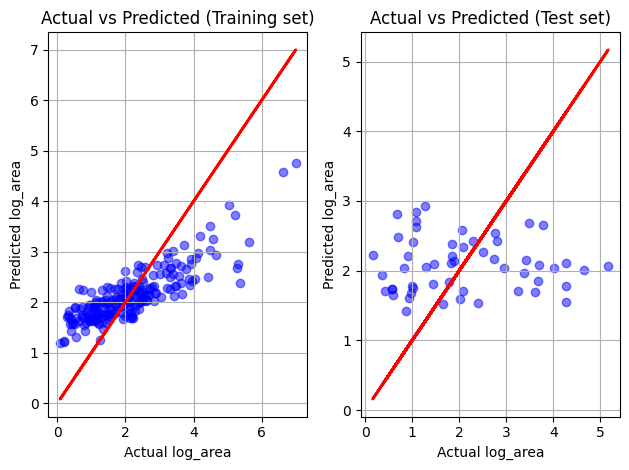

In [ ]:
# Plot of regression task for training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_dt, color='blue', alpha=0.5)
plt.plot(y_train, y_train, color='red', linewidth=2)
plt.title('Actual vs Predicted (Training set)')
plt.xlabel('Actual log_area')
plt.ylabel('Predicted log_area')
plt.grid(True)

# Plot of regression task for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_dt, color='blue', alpha=0.5)
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Actual vs Predicted (Test set)')
plt.xlabel('Actual log_area')
plt.ylabel('Predicted log_area')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Combine results for evaluation
y_test_combined = np.zeros_like(y_test_clf, dtype=float)
y_test_combined[y_test_clf == 1] = rf.predict(X_test_clf[y_test_clf == 1])

# Calculate overall metrics
overall_rmse = mean_squared_error(df['log_area'][X_test_clf.index], y_test_combined, squared=False)
overall_r2 = r2_score(df['log_area'][X_test_clf.index], y_test_combined)

print(f'Overall Test Set RMSE: {overall_rmse}')
print(f'Overall Test Set R²: {overall_r2}')

Overall Test Set RMSE: 0.5588569747336563
Overall Test Set R²: 0.8130434200963594


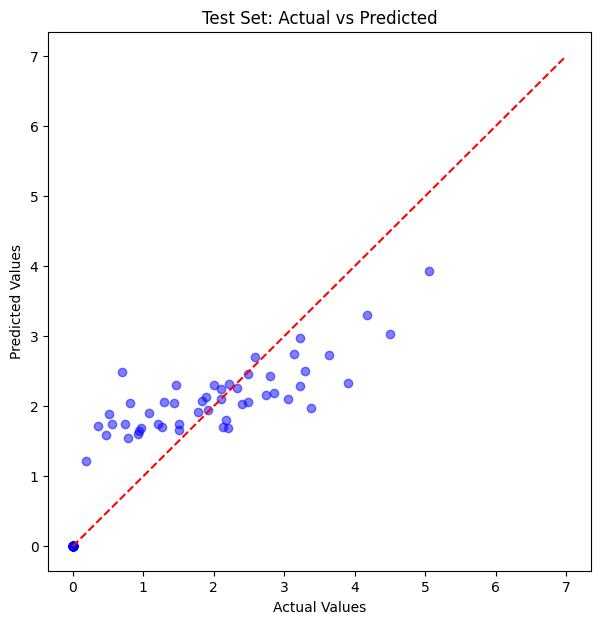

In [ ]:
# Plot actual vs predicted for test data

plt.figure(figsize=(7, 7))
plt.scatter(df['log_area'][X_test_clf.index], y_test_combined, color='blue', alpha=0.5)
plt.plot([df['log_area'].min(), df['log_area'].max()], [df['log_area'].min(), df['log_area'].max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Actual vs Predicted')
plt.show()

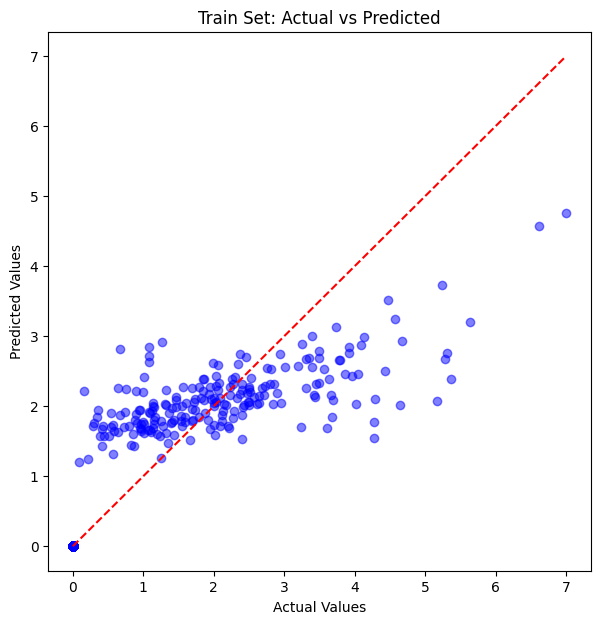

In [ ]:
# Plot actual vs predicted for train data

y_train_combined = np.zeros_like(y_train_clf, dtype=float)
y_train_combined[y_train_clf == 1] = rf.predict(X_train_clf[y_train_clf == 1])

plt.figure(figsize=(7, 7))
plt.scatter(df['log_area'][X_train_clf.index], y_train_combined, color='blue',alpha=0.5)
plt.plot([df['log_area'].min(), df['log_area'].max()], [df['log_area'].min(), df['log_area'].max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Train Set: Actual vs Predicted')
plt.show()

#Train Test splitting before Transformation.

In [ ]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(df.drop(['area', 'log_area','is_non_zero'], axis = 1), df['is_non_zero'], test_size=0.2, random_state=3)

In [ ]:
X_train_clf.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,num_fires
313,92.4,96.2,739.4,8.6,19.2,24,4.9,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,35
365,91.0,276.3,825.1,7.1,13.8,77,7.6,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,25
290,93.1,180.4,430.8,11.0,26.9,28,5.4,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2
344,92.1,99.0,745.3,9.6,17.4,57,4.5,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,42
116,90.1,39.7,86.6,6.2,10.6,30,4.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,42


In [ ]:
df_non_zero = df[df['log_area'] != 0.00]
X = df_non_zero.drop(columns=['log_area', 'area', 'is_non_zero'])
y = df_non_zero['log_area']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=56)

In [ ]:
y_train_reg.head()

,log_area
242,0.565314
234,5.365415
204,2.800325
432,0.431782
235,6.995620


## 2. Feature Transformation

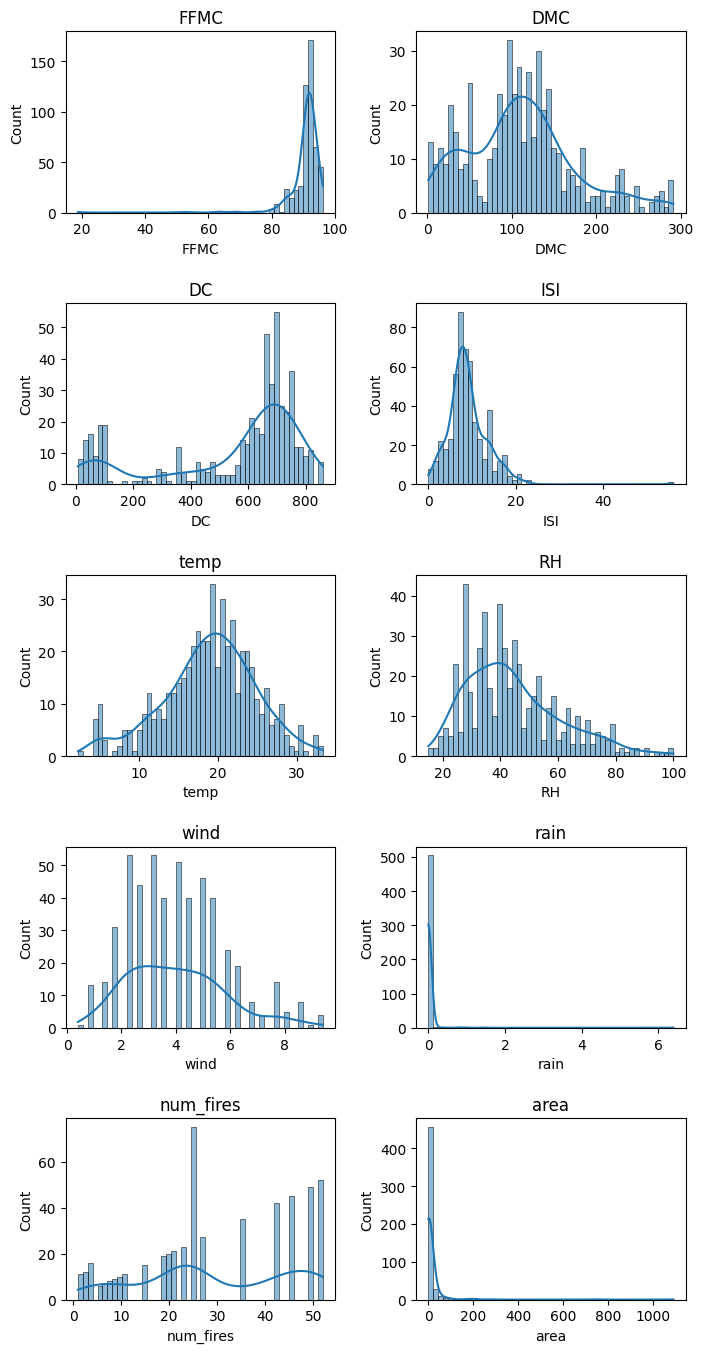

In [ ]:
plt.figure(figsize=(8, 20))

for i, column in enumerate(df2.columns):
    plt.subplot(len(df2.columns)//2 + 1, 2, i + 1)
    sns.histplot(x=df2[column],kde=True, bins = 50)
    plt.title(column)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

In [ ]:
skewness_ = {}
kurtosis_ = {}

for i in df2.columns:
    skewness_[i] = round(df2[i].skew(), 2)
    kurtosis_[i] = round(df2[i].kurtosis(), 2)

summary_table = pd.DataFrame({
    'Column': df2.columns,
    'Skewness': [skewness_[i] for i in df2.columns],
    'Kurtosis': [kurtosis_[i] for i in df2.columns]
})

print(summary_table)

      Column  Skewness  Kurtosis
0       FFMC     -6.55     66.53
1        DMC      0.55      0.19
2         DC     -1.11     -0.22
3        ISI      2.53     21.30
4       temp     -0.33      0.11
5         RH      0.85      0.41
6       wind      0.58      0.05
7       rain     19.74    418.03
8  num_fires     -0.09     -1.18
9       area     12.80    192.73


We see that FFMC, ISI, RAIN and AREA are highly skewed and have sharp peaks. We've already trasformed area to log_area. Dealing with others one-by-one.

### **Transforming FFMC**

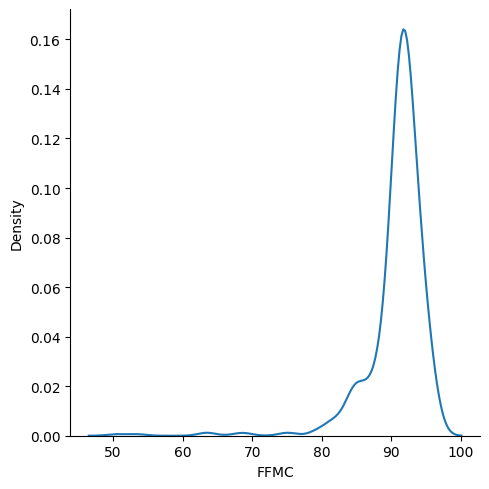

In [ ]:
## Transforming the ffmc column
sns.displot(x=df['FFMC'], kind= 'kde')

In [ ]:
# since this plot shows that it is negatively skewned we need to apply common transformations

In [ ]:
df['FFMC_sq'] = df['FFMC']**2

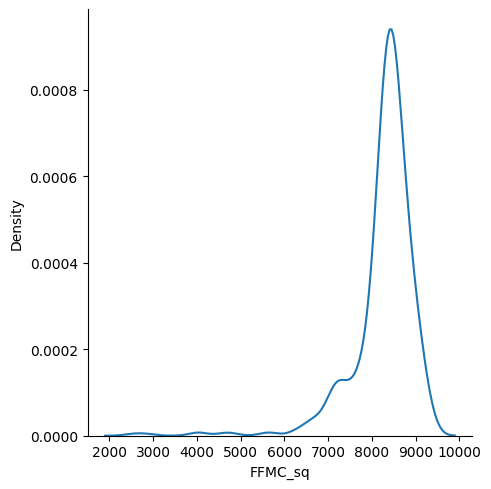

In [ ]:
sns.displot(df['FFMC_sq'], kind  = 'kde')

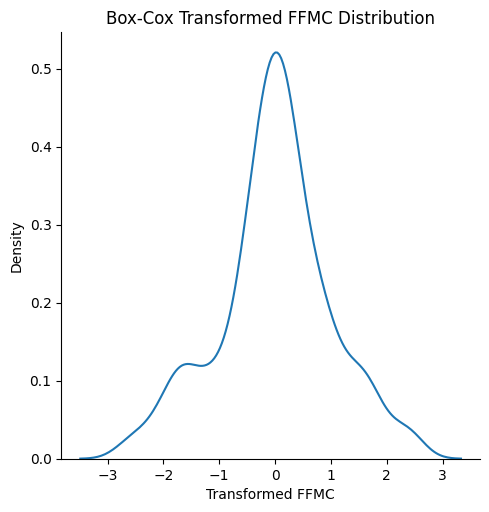

In [ ]:
df = df.drop(columns = ['FFMC_sq'])

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')

df['FFMC_bc'] = pt.fit_transform(df[['FFMC']])

sns.displot(df['FFMC_bc'], kind='kde')
plt.title('Box-Cox Transformed FFMC Distribution')
plt.xlabel('Transformed FFMC')
plt.ylabel('Density')
plt.show()

Clearly, the graph is a lot more normal-like. Let's check the skewness and kurtosis.

In [ ]:
df['FFMC_bc'].skew()

-0.13916305416721544

The value of skewness, -0.2623, is very close to zero. Thus, the data is very symmetric.

In [ ]:
df['FFMC_bc'].kurtosis()

0.2721243200557204

And the value of Kurtosis is 0.375 which is greater than 0 means data is slightly pointy to the normal distribution.

In [ ]:
pt = PowerTransformer(method='box-cox')
X_train_clf['FFMC_bc'] = pt.fit_transform(X_train_clf[['FFMC']])
X_train_clf = X_train_clf.drop(columns = ['FFMC'])

X_test_clf['FFMC_bc'] = pt.fit_transform(X_test_clf[['FFMC']])
X_test_clf = X_test_clf.drop(columns = ['FFMC'])

X_train_clf.head()

,DMC,DC,ISI,temp,RH,wind,rain,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,num_fires,FFMC_bc
313,96.2,739.4,8.6,19.2,24,4.9,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,35,0.326958
365,276.3,825.1,7.1,13.8,77,7.6,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,25,-0.222953
290,180.4,430.8,11.0,26.9,28,5.4,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0.643134
344,99.0,745.3,9.6,17.4,57,4.5,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,42,0.200245
116,39.7,86.6,6.2,10.6,30,4.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,42,-0.525173


In [ ]:
X_train_reg.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,num_fires
242,91.8,175.1,700.7,13.8,26.8,38,6.3,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,42
234,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,19
204,93.5,139.4,594.2,20.3,22.9,31,7.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,25
432,92.1,207.0,672.6,8.2,26.8,35,1.3,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,52
235,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,49


In [ ]:
X_train_reg['FFMC_bc'] = pt.fit_transform(X_train_reg[['FFMC']])
X_train_reg = X_train_reg.drop(columns = ['FFMC'])

X_test_reg['FFMC_bc'] = pt.fit_transform(X_test_reg[['FFMC']])
X_test_reg = X_test_reg.drop(columns = ['FFMC'])

X_train_reg.head()

,DMC,DC,ISI,temp,RH,wind,rain,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,num_fires,FFMC_bc
242,175.1,700.7,13.8,26.8,38,6.3,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,42,0.006412
234,129.5,692.6,7.0,18.8,40,2.2,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,19,-0.298381
204,139.4,594.2,20.3,22.9,31,7.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,25,0.780726
432,207.0,672.6,8.2,26.8,35,1.3,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,52,0.129943
235,121.1,674.4,8.6,25.1,27,4.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,49,0.303015


### **Transforming ISI**

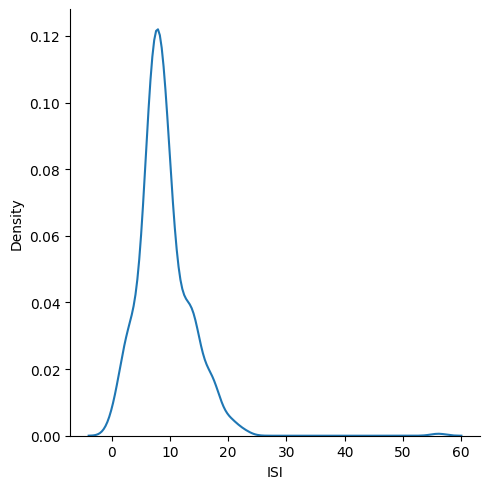

In [ ]:
sns.displot(df['ISI'], kind = 'kde')

In [ ]:
df['log_ISI'] = np.log1p(df['ISI'])

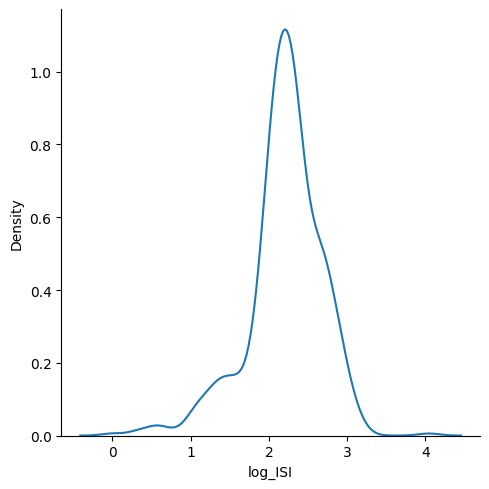

In [ ]:
sns.displot(df['log_ISI'], kind = 'kde')

In [ ]:
df['log_ISI'].skew()

-0.9318854400229527

In [ ]:
df['log_ISI'].kurtosis()

2.5468052606339695

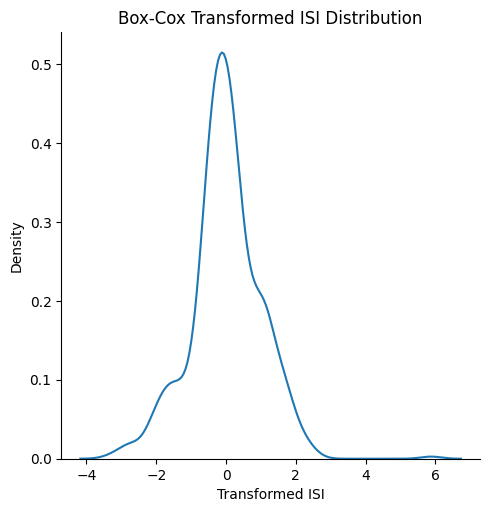

In [ ]:
pt1 = PowerTransformer()

df['ISI_bc'] = pt1.fit_transform(df[['ISI']])

sns.displot(df['ISI_bc'], kind='kde')
plt.title('Box-Cox Transformed ISI Distribution')
plt.xlabel('Transformed ISI')
plt.ylabel('Density')
plt.show()

In [ ]:
df['ISI_bc'].skew()

0.11396945536864651

In [ ]:
df['ISI_bc'].kurtosis()

2.452061041379916

Clearly, Box-Cox transformation gives better results for transforming ISI.

In [ ]:
pt = PowerTransformer()
X_train_clf['ISI_bc'] = pt.fit_transform(X_train_clf[['ISI']])
X_train_clf = X_train_clf.drop(columns = ['ISI'])

X_test_clf['ISI_bc'] = pt.fit_transform(X_test_clf[['ISI']])
X_test_clf = X_test_clf.drop(columns = ['ISI'])

X_train_clf.head()

,DMC,DC,temp,RH,wind,rain,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,num_fires,FFMC_bc,ISI_bc
313,96.2,739.4,19.2,24,4.9,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,35,0.326958,0.022577
365,276.3,825.1,13.8,77,7.6,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,25,-0.222953,-0.343764
290,180.4,430.8,26.9,28,5.4,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0.643134,0.541350
344,99.0,745.3,17.4,57,4.5,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,42,0.200245,0.247491
116,39.7,86.6,10.6,30,4.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,42,-0.525173,-0.584114


In [ ]:
X_train_reg['ISI_bc'] = pt.fit_transform(X_train_reg[['ISI']])
X_train_reg = X_train_reg.drop(columns = ['ISI'])

X_test_reg['ISI_bc'] = pt.fit_transform(X_test_reg[['ISI']])
X_test_reg = X_test_reg.drop(columns = ['ISI'])

X_train_reg.head()

,DMC,DC,temp,RH,wind,rain,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,num_fires,FFMC_bc,ISI_bc
242,175.1,700.7,26.8,38,6.3,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,42,0.006412,1.069409
234,129.5,692.6,18.8,40,2.2,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,19,-0.298381,-0.494236
204,139.4,594.2,22.9,31,7.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,25,0.780726,2.246984
432,207.0,672.6,26.8,35,1.3,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,52,0.129943,-0.179772
235,121.1,674.4,25.1,27,4.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,49,0.303015,-0.079590


##Transforming Rain

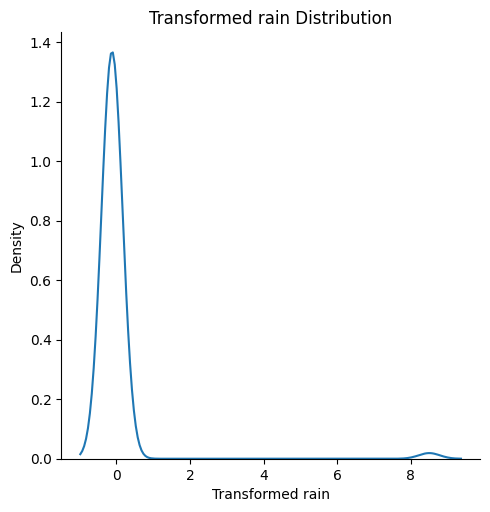

In [ ]:
pt1 = PowerTransformer()

df['rain_bc'] = pt1.fit_transform(df[['rain']])

sns.displot(df['rain_bc'], kind='kde')
plt.title('Transformed rain Distribution')
plt.xlabel('Transformed rain')
plt.ylabel('Density')
plt.show()

Clearly, no transformations can change the skewness of rain.

Encoding the rain column such that 1 indicates the occurance of rain and zero states otherwise.

In [ ]:
df['rained'] = df['rain'].apply(lambda x: 1 if x > 0 else 0)
df =df.drop(['rain','rain_bc'],axis=1)

In [ ]:
# scaler = MinMaxScaler()

# for col in X_train_reg.columns:
#     X_train_reg[col] = scaler.fit_transform(X_train_reg[[col]])
#     X_test_reg[col] = scaler.transform(X_test_reg[[col]])

In [ ]:
# X_train_reg.head()

,DMC,DC,temp,RH,wind,rain,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,num_fires,FFMC_bc,ISI_bc
242,0.599372,0.815843,0.773519,0.283951,0.655556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.803922,0.524886,0.711043
234,0.440377,0.806194,0.494774,0.308642,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.352941,0.463917,0.422394
204,0.474895,0.688982,0.637631,0.197531,0.755556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.470588,0.679776,0.928423
432,0.710600,0.782370,0.773519,0.246914,0.100000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.549597,0.480444
235,0.411088,0.784515,0.714286,0.148148,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.941176,0.584217,0.498937


In [ ]:
# for col in X_train_clf.columns:
#     X_train_clf[col] = scaler.fit_transform(X_train_clf[[col]])
#     X_test_clf[col] = scaler.transform(X_test_clf[[col]])

# X_train_clf.head()

,DMC,DC,temp,RH,wind,rain,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,num_fires,FFMC_bc,ISI_bc
313,0.327705,0.857863,0.550162,0.105882,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.583590,0.371916
365,0.948312,0.958368,0.375405,0.729412,0.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.470588,0.475877,0.331501
290,0.617850,0.495954,0.799353,0.152941,0.555556,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.019608,0.645520,0.429148
344,0.337354,0.864782,0.491909,0.494118,0.455556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.803922,0.558770,0.396729
116,0.133012,0.092295,0.271845,0.176471,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.803922,0.416681,0.304986


##Model Fitting after transformations

In [ ]:
# Train Logistic Regression classifier
clf = LogisticRegression(random_state=5)
clf.fit(X_train_clf, y_train_clf)

# Predict and evaluate the classifier
y_pred_train_clf = clf.predict(X_train_clf)
y_pred_test_clf = clf.predict(X_test_clf)

print("Classification Report (Train):")
print(classification_report(y_train_clf, y_pred_train_clf))

print("Classification Report (Test):")
print(classification_report(y_test_clf, y_pred_test_clf))

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.61      0.49      0.55       199
           1       0.60      0.71      0.65       211

    accuracy                           0.60       410
   macro avg       0.60      0.60      0.60       410
weighted avg       0.60      0.60      0.60       410

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.47      0.44      0.45        45
           1       0.58      0.60      0.59        58

    accuracy                           0.53       103
   macro avg       0.52      0.52      0.52       103
weighted avg       0.53      0.53      0.53       103



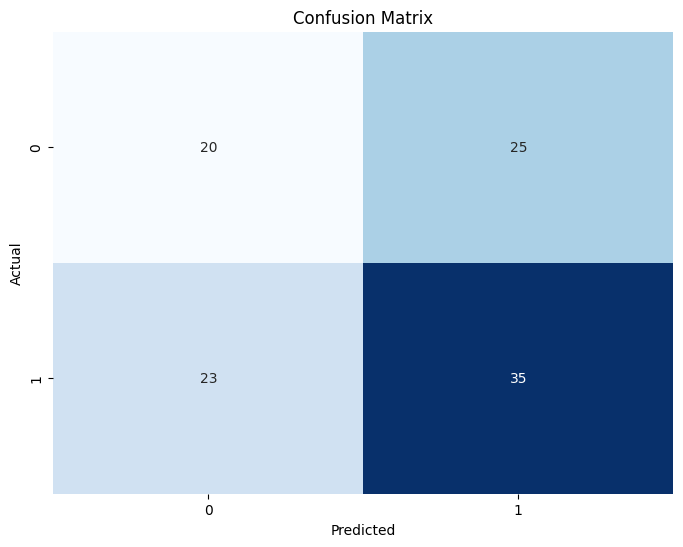

In [ ]:
# Plot confusion matrix for classification task
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_clf, y_pred_test_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Train Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=5)
clf.fit(X_train_clf, y_train_clf)

# Predict and evaluate the classifier
y_pred_train_clf = clf.predict(X_train_clf)
y_pred_test_clf = clf.predict(X_test_clf)

print("Classification Report (Train):")
print(classification_report(y_train_clf, y_pred_train_clf))

print("Classification Report (Test):")
print(classification_report(y_test_clf, y_pred_test_clf))

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       199
           1       0.71      0.80      0.75       211

    accuracy                           0.73       410
   macro avg       0.73      0.73      0.73       410
weighted avg       0.73      0.73      0.73       410

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        45
           1       0.65      0.59      0.62        58

    accuracy                           0.59       103
   macro avg       0.59      0.59      0.59       103
weighted avg       0.60      0.59      0.59       103



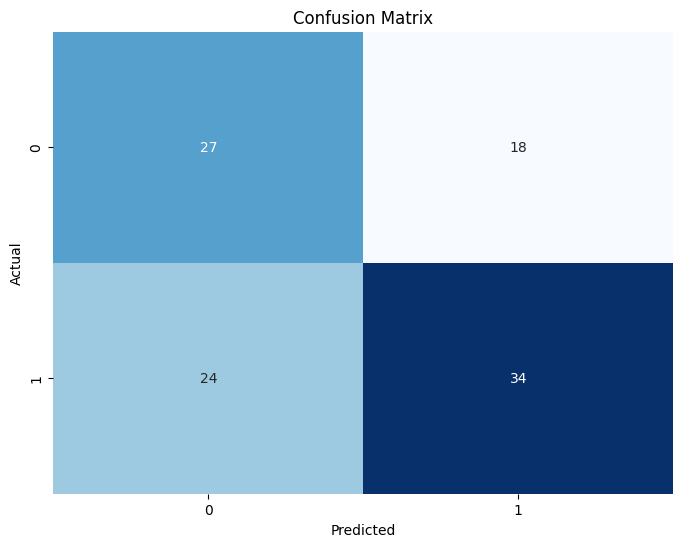

In [ ]:
# Plot confusion matrix for classification task
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_clf, y_pred_test_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Train Randon Forest classifier
clf = RandomForestClassifier(max_depth=4, random_state=5)
clf.fit(X_train_clf, y_train_clf)

# Predict and evaluate the classifier
y_pred_train_clf = clf.predict(X_train_clf)
y_pred_test_clf = clf.predict(X_test_clf)

print("Classification Report (Train):")
print(classification_report(y_train_clf, y_pred_train_clf))

print("Classification Report (Test):")
print(classification_report(y_test_clf, y_pred_test_clf))

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       199
           1       0.72      0.83      0.77       211

    accuracy                           0.75       410
   macro avg       0.75      0.75      0.75       410
weighted avg       0.75      0.75      0.75       410

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        45
           1       0.65      0.67      0.66        58

    accuracy                           0.61       103
   macro avg       0.60      0.60      0.60       103
weighted avg       0.61      0.61      0.61       103



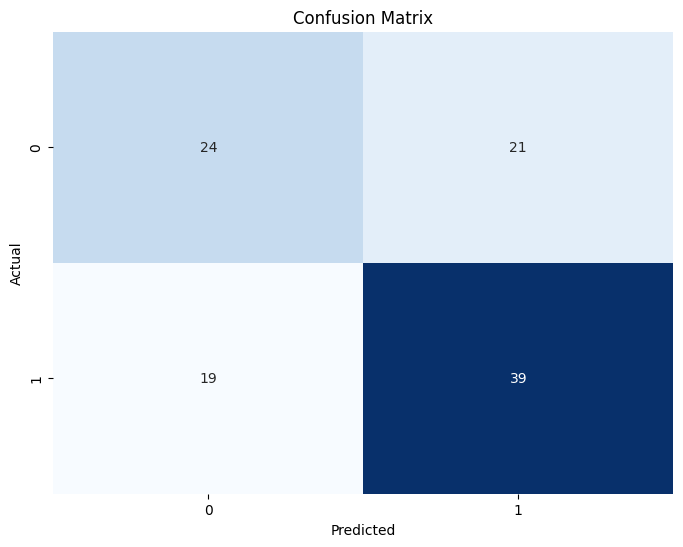

In [ ]:
# Plot confusion matrix for classification task
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_clf, y_pred_test_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def regression_models_evaluation(df, target_col, test_size=0.2, random_state=42):

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1),
        'Lasso': Lasso(),
        'Elastic Net': ElasticNet(alpha=0.05, l1_ratio=0.5),
        'Decision Tree': DecisionTreeRegressor(max_depth=5),
        'Random Forest': RandomForestRegressor(n_estimators=150, random_state=14)
    }

    # List to store results
    results_list = []

    # Train and evaluate models
    for name, model in models.items():
        model.fit(X_train_reg, y_train_reg)
        y_pred_train_reg = model.predict(X_train_reg)
        y_pred_test_reg = model.predict(X_test_reg)


    # Calculate metrics
        rmse_train = mean_squared_error(y_train_reg, y_pred_train_reg, squared=False)
        rmse_test = mean_squared_error(y_test_reg, y_pred_test_reg, squared=False)
        r2_train = r2_score(y_train_reg, y_pred_train_reg)
        r2_test = r2_score(y_test_reg, y_pred_test_reg)

        results_list.append({
            'Model': name,
            'RMSE Train': rmse_train,
            'RMSE Test': rmse_test,
            'R2 Train': r2_train,
            'R2 Test': r2_test,
        })
    results = pd.DataFrame(results_list)
    return results, X_train_reg, X_test_reg, y_train_reg, y_test_reg

In [ ]:
# Execute the evaluation
results, X_train_reg, X_test_reg, y_train_reg, y_test_reg = regression_models_evaluation(df_non_zero, 'log_area')
print(results)

               Model  RMSE Train  RMSE Test  R2 Train   R2 Test
0  Linear Regression    1.171011   1.234727  0.140261 -0.028874
1              Ridge    1.185052   1.234200  0.119520 -0.027997
2              Lasso    1.262925   1.224446  0.000000 -0.011813
3        Elastic Net    1.242639   1.234536  0.031867 -0.028556
4      Decision Tree    1.023765   1.421554  0.342879 -0.363790
5      Random Forest    0.491421   1.201394  0.848591  0.025927


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the model
# rf = RandomForestRegressor()

# # Set up the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the model
# grid_search.fit(X_train_reg, y_train_reg)

# # Get the best model and evaluate it
# best_rf = grid_search.best_estimator_
# y_pred_reg = best_rf.predict(X_test_reg)

# # Output results
# print("Best parameters found: ", grid_search.best_params_)
# print("Best score found: ", grid_search.best_score_)
# print("\nRMSE test:\n", mean_squared_error(y_test_reg, y_pred_test_reg, squared=False))
# print("\nR2 test:\n", r2_score(y_test_reg, y_pred_test_reg))

In [ ]:
# Train Decision Tree Model
rf = RandomForestRegressor(max_depth=5)
rf.fit(X_train_reg,y_train_reg)
y_pred_train_dt = rf.predict(X_train_reg)
y_pred_test_dt = rf.predict(X_test_reg)

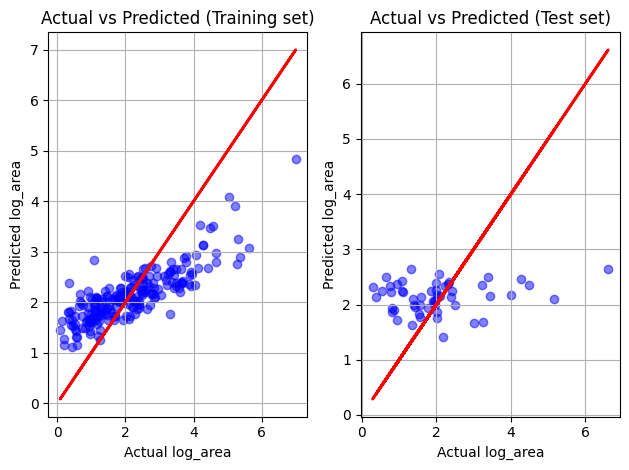

In [ ]:
# Plot of regression task for training set
plt.subplot(1, 2, 1)
plt.scatter(y_train_reg, y_pred_train_dt, color='blue', alpha=0.5)
plt.plot(y_train_reg, y_train_reg, color='red', linewidth=2)
plt.title('Actual vs Predicted (Training set)')
plt.xlabel('Actual log_area')
plt.ylabel('Predicted log_area')
plt.grid(True)

# Plot of regression task for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test_reg, y_pred_test_dt, color='blue', alpha=0.5)
plt.plot(y_test_reg, y_test_reg, color='red', linewidth=2)
plt.title('Actual vs Predicted (Test set)')
plt.xlabel('Actual log_area')
plt.ylabel('Predicted log_area')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Combine results for evaluation
y_test_combined = np.zeros_like(y_test_clf, dtype=float)
y_test_combined[y_test_clf == 1] = rf.predict(X_test_clf[y_test_clf == 1])

# Calculate overall metrics
overall_rmse = mean_squared_error(df['log_area'][X_test_clf.index], y_test_combined, squared=False)
overall_r2 = r2_score(df['log_area'][X_test_clf.index], y_test_combined)

print(f'Overall Test Set RMSE: {overall_rmse}')
print(f'Overall Test Set R²: {overall_r2}')

Overall Test Set RMSE: 0.9336996290246965
Overall Test Set R²: 0.6479500331438177


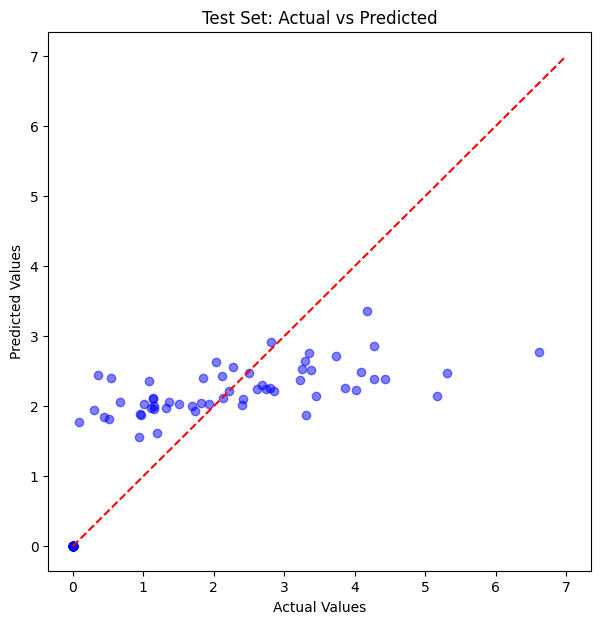

In [ ]:
# Plot actual vs predicted for test data

plt.figure(figsize=(7, 7))
plt.scatter(df['log_area'][X_test_clf.index], y_test_combined, color='blue', alpha=0.5)
plt.plot([df['log_area'].min(), df['log_area'].max()], [df['log_area'].min(), df['log_area'].max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Actual vs Predicted')
plt.show()

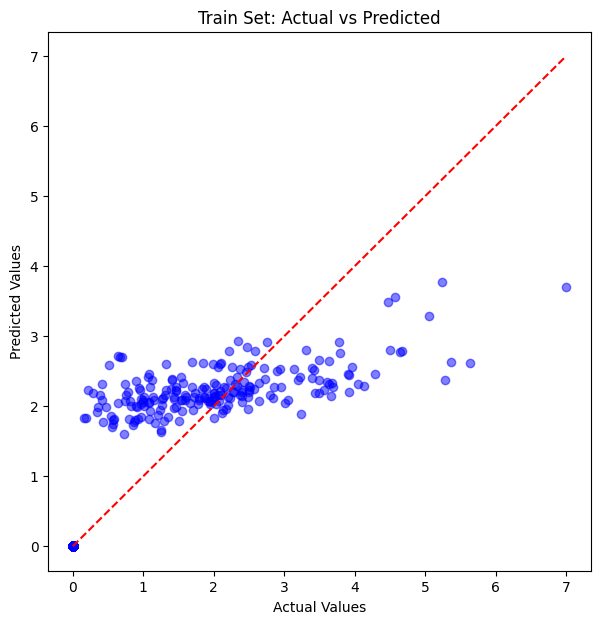

In [ ]:
# Plot actual vs predicted for train data

y_train_combined = np.zeros_like(y_train_clf, dtype=float)
y_train_combined[y_train_clf == 1] = rf.predict(X_train_clf[y_train_clf == 1])

plt.figure(figsize=(7, 7))
plt.scatter(df['log_area'][X_train_clf.index], y_train_combined, color='blue',alpha=0.5)
plt.plot([df['log_area'].min(), df['log_area'].max()], [df['log_area'].min(), df['log_area'].max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Train Set: Actual vs Predicted')
plt.show()